# USA Births Data

This dataset records birth rates in the USA by year. It was compiled from data on the [CDC website](http://www.cdc.gov/nchs/data_access/Vitalstatsonline.htm) and is aggregated so as to comply with their terms of use.

In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
import pandas as pd

In [2]:
births = pd.read_csv('births.csv')
births.head()

,year,month,day,gender,births,mother_age,father_age
0,1969,1,1,F,4046,24.599110,34.454770
1,1969,1,1,M,4440,24.347297,34.940541
2,1969,1,2,F,4454,24.601257,34.709026
3,1969,1,2,M,4548,24.630167,34.262533
4,1969,1,3,F,4548,24.940193,34.907652


In [3]:
# throw out bad data
births = births.query('(births > 1000) & (births < 30000)')

# set 'day' column to integer; was a string due to nulls
births['day'] = births['day'].astype(int)

In [4]:
# Choose a leap year to display births by date
dates = [pd.datetime(2012, month, day)
         for (month, day) in zip(births['month'], births['day'])]

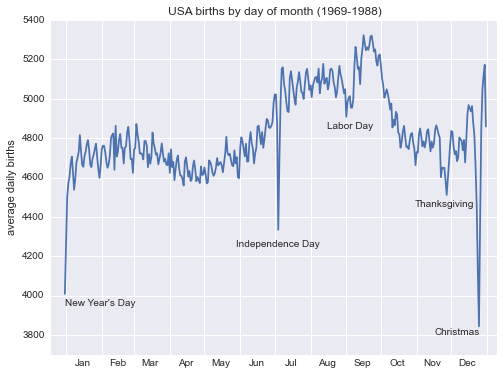

In [5]:
# Plot the results
fig, ax = plt.subplots(figsize=(8, 6))
births.groupby(dates)['births'].mean().plot(ax=ax)

# Label the plot
ax.text('2012-1-1', 3950, "New Year's Day")
ax.text('2012-7-4', 4250, "Independence Day", ha='center')
ax.text('2012-9-4', 4850, "Labor Day", ha='center')
ax.text('2012-11-25', 4450, "Thanksgiving", ha='center')
ax.text('2012-12-25', 3800, "Christmas", ha='right')
ax.set(title='USA births by day of month (1969-1988)',
       ylabel='average daily births',
       xlim=('2011-12-20','2013-1-10'),
       ylim=(3700, 5400));

# Format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));

Apparently American women love their holidays so much that they somehow decide not to give birth on those days!